In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# For clean plots
sns.set(style='whitegrid')

In [31]:
df = pd.read_csv("Youtube_Channel.csv")
df.head()


,Ranking,Username,Subscribers,Uploads,Views,Country
0,1,MrBeast,336M,838,6.685363e+10,US
1,2,T-Series,281M,22313,2.772430e+11,IN
2,3,Cocomelon-Nursery Rhymes,186M,1370,1.943620e+11,US
3,4,Youtube Movies,185M,0,0.000000e+00,US
4,5,Set India,180M,148727,1.727090e+11,IN


In [32]:
# Remove 'M' and convert to float (Millions)
df['Subscribers'] = df['Subscribers'].str.replace('M', '').astype(float) * 1_000_000

In [33]:
# Check for missing or duplicate values
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 Ranking        0
Username       0
Subscribers    0
Uploads        0
Views          0
Country        0
dtype: int64

Duplicate rows: 0


In [34]:
df.head(2)

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1,MrBeast,336000000.0,838,6.685363e+10,US
1,2,T-Series,281000000.0,22313,2.772430e+11,IN


In [35]:
# Basic Descriptive Statistics
df.describe()[['Subscribers', 'Views', 'Uploads']]

,Subscribers,Views,Uploads
count,1.000000e+02,1.000000e+02,100.000000
mean,7.323800e+07,4.054368e+10,25681.220000
std,4.449087e+07,4.033803e+10,72524.113223
min,4.550000e+07,0.000000e+00,0.000000
25%,5.005000e+07,1.964624e+10,717.250000
50%,5.995000e+07,3.078494e+10,1891.000000
75%,7.447500e+07,4.472049e+10,7028.000000
max,3.360000e+08,2.772430e+11,433181.000000


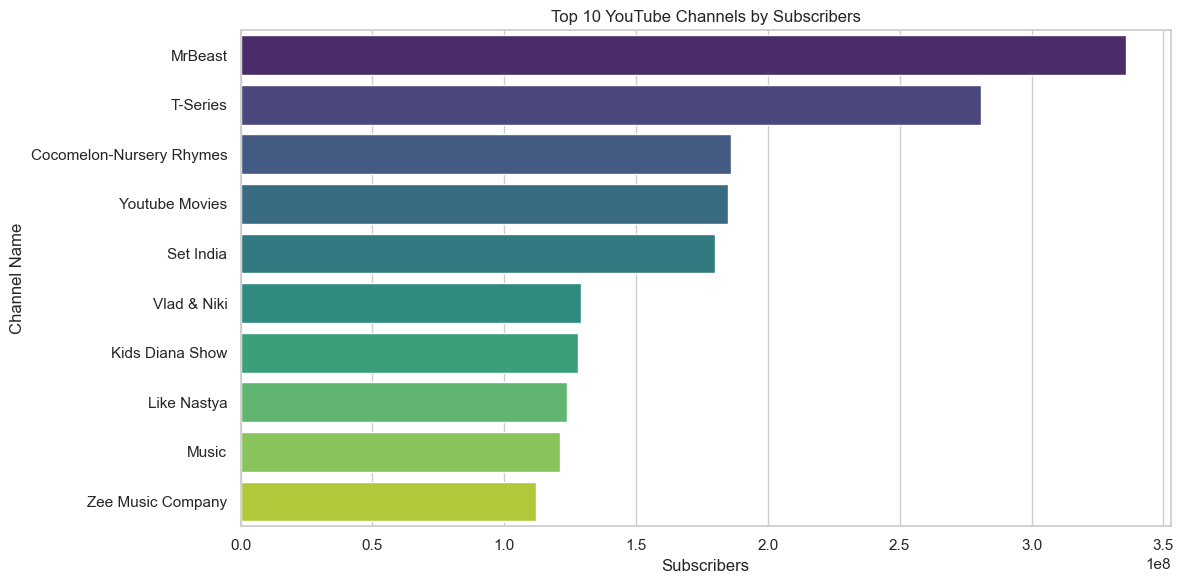

In [36]:
# Top 10 Channels by Subscribers
top_subs = df.sort_values(by='Subscribers', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Subscribers', y='Username', data=top_subs, palette='viridis')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Channel Name')
plt.tight_layout()
plt.show()

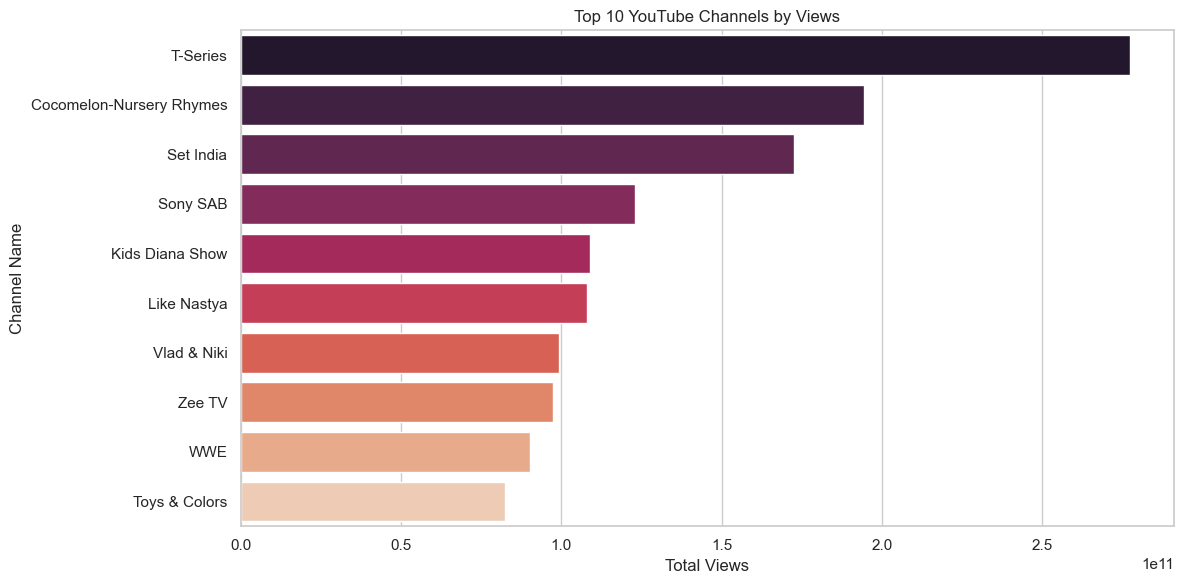

In [37]:
# Top 10 Channels by Views
top_views = df.sort_values(by='Views', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Views', y='Username', data=top_views, palette='rocket')
plt.title('Top 10 YouTube Channels by Views')
plt.xlabel('Total Views')
plt.ylabel('Channel Name')
plt.tight_layout()
plt.show()

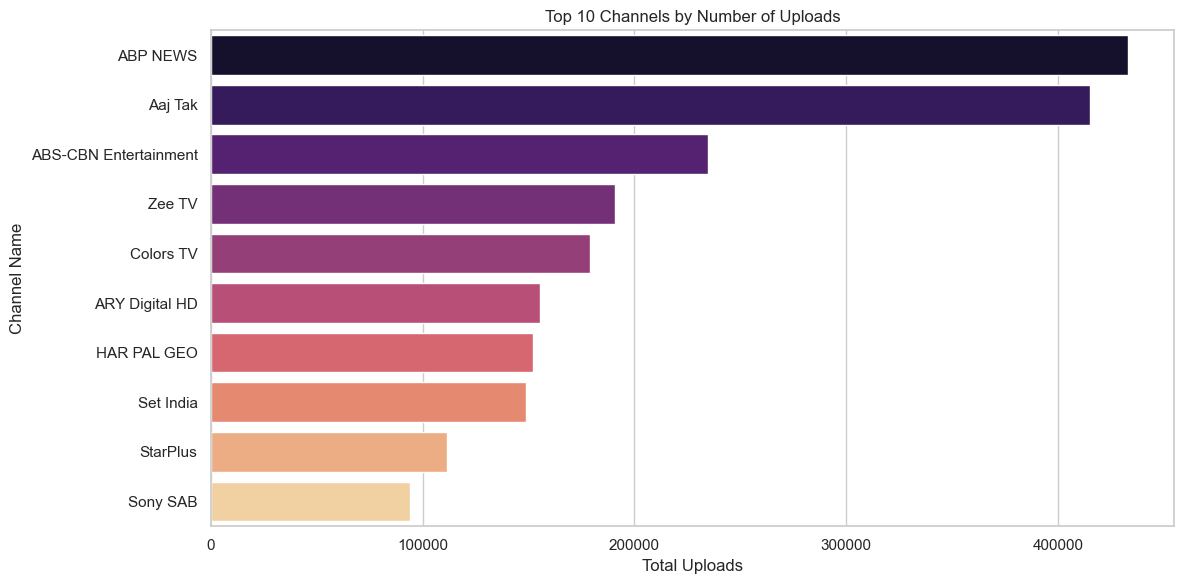

In [38]:
# Top 10 Channels by Uploads
top_uploads = df.sort_values(by='Uploads', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Uploads', y='Username', data=top_uploads, palette='magma')
plt.title('Top 10 Channels by Number of Uploads')
plt.xlabel('Total Uploads')
plt.ylabel('Channel Name')
plt.tight_layout()
plt.show()

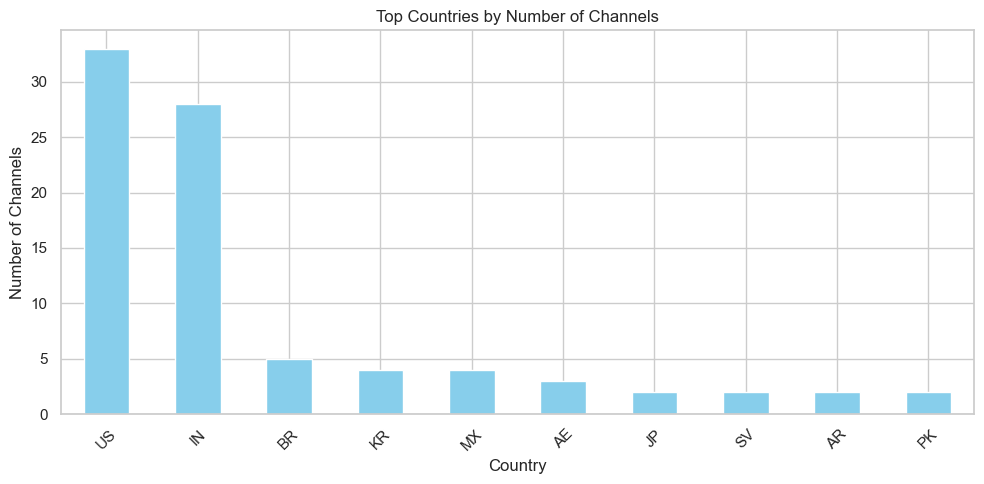

In [39]:
# Most Common Countries
plt.figure(figsize=(10,5))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Countries by Number of Channels")
plt.xlabel("Country")
plt.ylabel("Number of Channels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

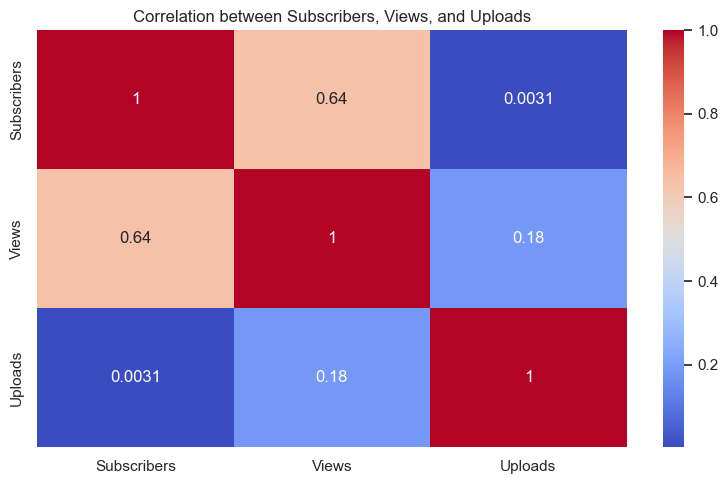

In [40]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['Subscribers', 'Views', 'Uploads']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Subscribers, Views, and Uploads")
plt.tight_layout()
plt.show()

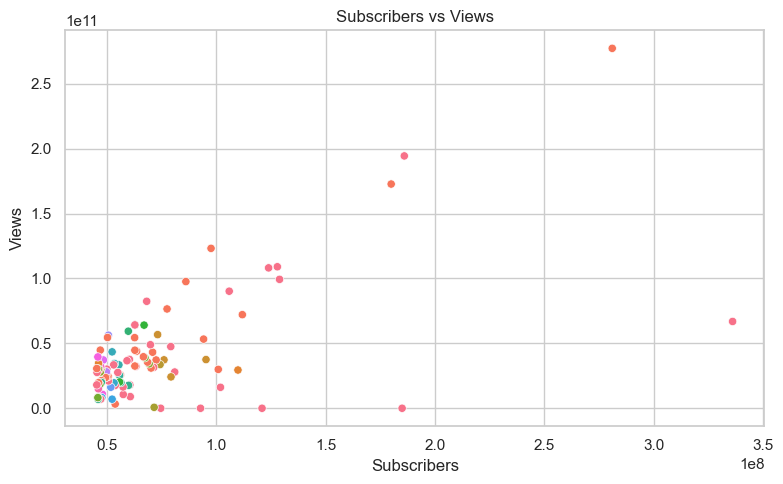

In [41]:
# Scatter Plot – Subscribers vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x='Subscribers', y='Views', data=df, hue='Country', legend=False)
plt.title("Subscribers vs Views")
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

In [42]:
# Save Cleaned Data (Optional)
df.to_csv("cleaned_youtube_channels.csv", index=False)